In [111]:
# import requests module
import requests
# import pandas library
import pandas as pd
# import seaborn library
import seaborn as sb

In [50]:
# API key for alphavantage.co
alphavantageKey = "Z1KIMYILLKW4QCL2"

In [51]:
# requests api endpoint for historical price data for VTI in JSON format
detailsVTI = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=VTI&outputsize=full&apikey="
                          + alphavantageKey).json()

In [1]:
#detailsVTI

In [121]:
# make a pandas dataframe out of the dictionary that was returned as the JSON in the detailsVTI request
vtiDF1 = pd.DataFrame.from_dict(detailsVTI["Time Series (Daily)"])
# transpose the dataframe to swap columns and rows using .T
vtiDFT = vtiDF1.T

In [122]:
# reset the index in order to have the dates be their own column
vtiDF = vtiDFT.reset_index()
# rename columns
vtiDF.columns = ["Date", "Open", "High", "Low", "Close Price", "Adj Close", "Volume", "Dividend Amount", "Split Coefficient"]
# add column to show which ticker
vtiDF["Ticker"] = "VTI"
# change the Close Price column values to be floats
vtiDF["Close Price"] = vtiDF["Close Price"].astype(float)
# change the Volume column values to be integers
vtiDF["Volume"] = vtiDF["Volume"].astype(int)
# filter for dates after 2010-11-01
filteredVtiDF = vtiDF[vtiDF["Date"] > "2010-11-01"]
# filter for dates before 2020-11-01
filteredVtiDF = filteredVtiDF[filteredVtiDF["Date"] < "2020-11-01"]
# sort dates from oldest to newest
filteredVtiDF = filteredVtiDF.sort_values("Date",ascending=True)
# filter to only get every 5th row (stock market is closed weekends, so every 5 rows is a new week)
filteredVtiDF = filteredVtiDF.iloc[::5]
filteredVtiDF

,Date,Open,High,Low,Close Price,Adj Close,Volume,Dividend Amount,Split Coefficient,Ticker
2796,2010-11-02,61.21,61.34,60.962,61.21,49.7596501805,1004000,0.0000,1.0,VTI
2791,2010-11-09,63.0,63.1,62.1,62.37,50.7026528632,1001800,0.0000,1.0,VTI
2786,2010-11-16,61.23,61.31,60.32,60.61,49.2718901722,2115400,0.0000,1.0,VTI
2781,2010-11-23,61.14,61.2,60.69,60.94,49.5401581767,1481100,0.0000,1.0,VTI
2776,2010-12-01,61.92,62.45,61.92,62.34,50.6782648628,1611600,0.0000,1.0,VTI
...,...,...,...,...,...,...,...,...,...,...
301,2020-10-01,171.72,172.25,170.61,171.73,169.421020402,3234067,0.0000,1.0,VTI
296,2020-10-08,175.53,175.89,174.88,175.84,173.475759783,2335209,0.0000,1.0,VTI
291,2020-10-15,175.61,178.07,175.1601,177.87,175.478465608,2865532,0.0000,1.0,VTI
286,2020-10-22,175.33,176.56,174.12,176.26,173.890112712,3763545,0.0000,1.0,VTI


In [123]:
# get just the ticker, date, and close price columns
vtiCloseDF = filteredVtiDF[["Ticker","Date","Close Price"]]
vtiCloseDF

,Ticker,Date,Close Price
2796,VTI,2010-11-02,61.21
2791,VTI,2010-11-09,62.37
2786,VTI,2010-11-16,60.61
2781,VTI,2010-11-23,60.94
2776,VTI,2010-12-01,62.34
...,...,...,...
301,VTI,2020-10-01,171.73
296,VTI,2020-10-08,175.84
291,VTI,2020-10-15,177.87
286,VTI,2020-10-22,176.26


In [124]:
# read in csv file and create pandas dataframe
ixicDF = pd.read_csv("YF-IXIC.csv")
# rename columns
ixicDF.columns = ["Ticker","Date","Close Price","Raw Close","High","Low","Open","Volume"]
# reassign the values of the Ticker column to be IXIC instead of ^IXIC
ixicDF["Ticker"] = "IXIC"
# filter for dates after 2010-11-01
filteredIxicDF = ixicDF[ixicDF["Date"] > "2010-11-01"]
# filter for dates before 2020-11-01
filteredIxicDF = filteredIxicDF[filteredIxicDF["Date"] < "2020-11-01"]
# filter to only get every 5th row
filteredIxicDF = filteredIxicDF.iloc[::5]
filteredIxicDF

,Ticker,Date,Close Price,Raw Close,High,Low,Open,Volume
1994,IXIC,2010-11-02,2533.520020,2533.520020,2534.879883,2518.290039,2525.939941,1.914980e+09
1999,IXIC,2010-11-09,2562.979980,2562.979980,2592.939941,2552.929932,2587.080078,2.157370e+09
2004,IXIC,2010-11-16,2469.840088,2469.840088,2503.290039,2459.790039,2494.209961,2.234090e+09
2009,IXIC,2010-11-23,2494.949951,2494.949951,2510.090088,2483.159912,2504.209961,1.892260e+09
2014,IXIC,2010-12-01,2549.429932,2549.429932,2558.290039,2535.189941,2535.189941,2.109940e+09
...,...,...,...,...,...,...,...,...
4489,IXIC,2020-10-01,11326.509766,11326.509766,11344.129883,11240.530273,11291.990234,3.978100e+09
4494,IXIC,2020-10-08,11420.980469,11420.980469,11448.230469,11384.330078,11443.349609,3.486530e+09
4499,IXIC,2020-10-15,11713.870117,11713.870117,11740.679688,11559.099609,11559.879883,3.304490e+09
4504,IXIC,2020-10-22,11506.009766,11506.009766,11548.769531,11369.290039,11526.969727,3.414590e+09


In [125]:
# get just the ticker, date, and close price columns
ixicCloseDF = filteredIxicDF[["Ticker","Date","Close Price"]]
ixicCloseDF

,Ticker,Date,Close Price
1994,IXIC,2010-11-02,2533.520020
1999,IXIC,2010-11-09,2562.979980
2004,IXIC,2010-11-16,2469.840088
2009,IXIC,2010-11-23,2494.949951
2014,IXIC,2010-12-01,2549.429932
...,...,...,...
4489,IXIC,2020-10-01,11326.509766
4494,IXIC,2020-10-08,11420.980469
4499,IXIC,2020-10-15,11713.870117
4504,IXIC,2020-10-22,11506.009766


In [126]:
# read in csv file and create pandas dataframe
spxDF = pd.read_csv("SPX.csv")
# rename columns
spxDF.columns = ["Date","Open","High","Low","Close Price","Adj Close","Volume"]
# add column to show which ticker
spxDF["Ticker"] = "SPX"
# filter for dates after 2010-11-01
filteredSpxDF = spxDF[spxDF["Date"] > "2010-11-01"]
# filter for dates before 2020-11-01
filteredSpxDF = filteredSpxDF[filteredSpxDF["Date"] < "2020-11-01"]
# filter to only get every 5th row
filteredSpxDF = filteredSpxDF.iloc[::5]
filteredSpxDF

,Date,Open,High,Low,Close Price,Adj Close,Volume,Ticker
20803,2010-11-02,1187.859985,1195.880005,1187.859985,1193.569946,1193.569946,3866200000,SPX
20808,2010-11-09,1223.589966,1226.839966,1208.939941,1213.400024,1213.400024,4848040000,SPX
20813,2010-11-16,1194.790039,1194.790039,1173.000000,1178.339966,1178.339966,5116380000,SPX
20818,2010-11-23,1192.510010,1192.510010,1176.910034,1180.729980,1180.729980,4133070000,SPX
20823,2010-12-01,1186.599976,1207.609985,1186.599976,1206.069946,1206.069946,4548110000,SPX
...,...,...,...,...,...,...,...,...
23298,2020-10-01,3385.870117,3397.179932,3361.389893,3380.800049,3380.800049,4070530000,SPX
23303,2020-10-08,3434.280029,3447.280029,3428.149902,3446.830078,3446.830078,3856190000,SPX
23308,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3483.340088,3717640000,SPX
23313,2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4163630000,SPX


In [127]:
# get just the ticker, date, and close price columns
spxCloseDF = filteredSpxDF[["Ticker","Date","Close Price"]]
spxCloseDF

,Ticker,Date,Close Price
20803,SPX,2010-11-02,1193.569946
20808,SPX,2010-11-09,1213.400024
20813,SPX,2010-11-16,1178.339966
20818,SPX,2010-11-23,1180.729980
20823,SPX,2010-12-01,1206.069946
...,...,...,...
23298,SPX,2020-10-01,3380.800049
23303,SPX,2020-10-08,3446.830078
23308,SPX,2020-10-15,3483.340088
23313,SPX,2020-10-22,3453.489990


In [128]:
# make list of the dataframes to combine
closeDFs = [vtiCloseDF, ixicCloseDF, spxCloseDF]
# use pd.concat() to combine the dataframes in closeDFs into a single dataframe
allCloseDF = pd.concat(closeDFs)
allCloseDF

,Ticker,Date,Close Price
2796,VTI,2010-11-02,61.210000
2791,VTI,2010-11-09,62.370000
2786,VTI,2010-11-16,60.610000
2781,VTI,2010-11-23,60.940000
2776,VTI,2010-12-01,62.340000
...,...,...,...
23298,SPX,2020-10-01,3380.800049
23303,SPX,2020-10-08,3446.830078
23308,SPX,2020-10-15,3483.340088
23313,SPX,2020-10-22,3453.489990


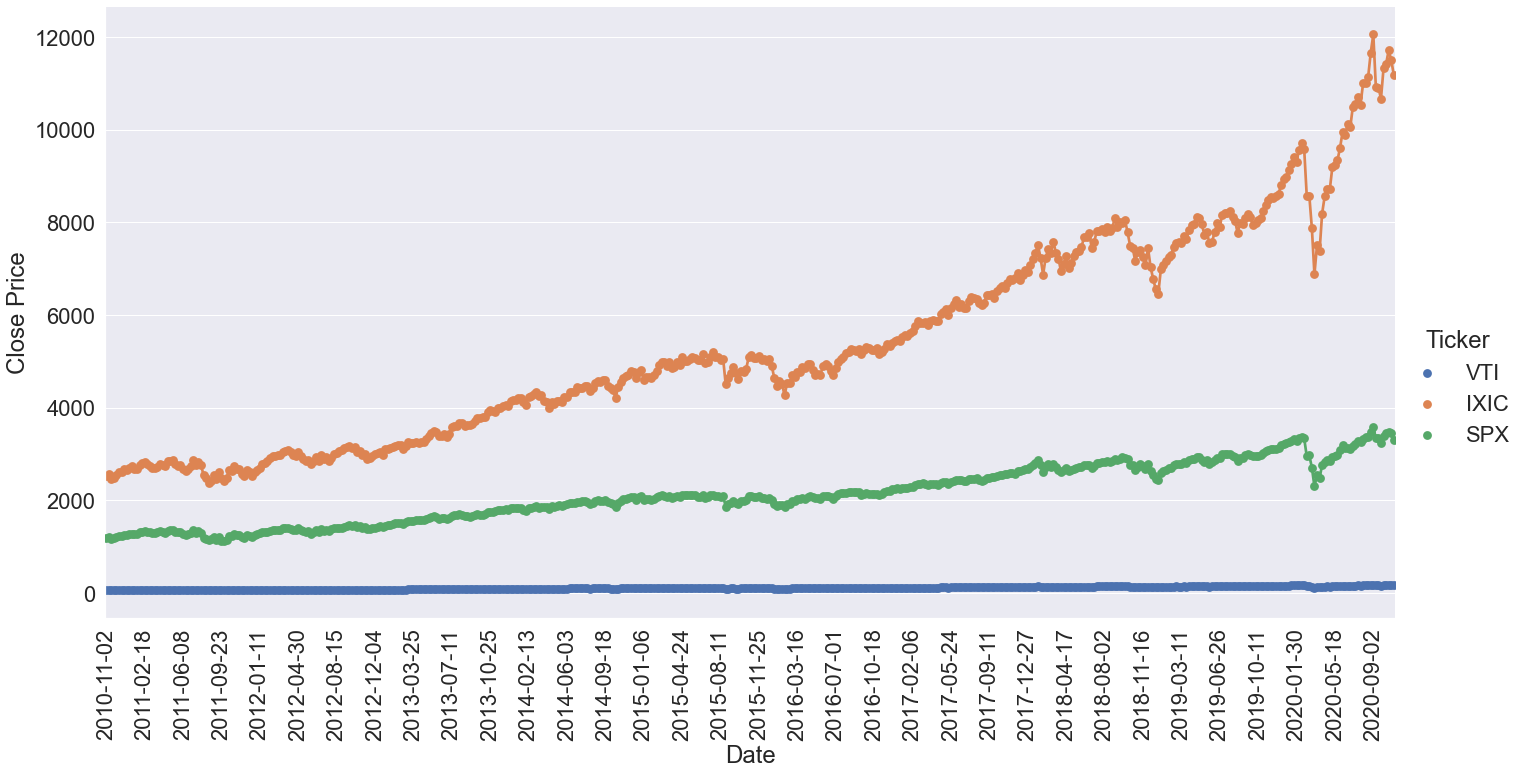

In [129]:
# set font size to be larger
sb.set(font_scale = 2)
# seaborn line plot using allCloseDF data with date on x axis and close price on y axis
closePricePlot = sb.catplot(x="Date",y="Close Price",hue="Ticker",data=allCloseDF,kind="point",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = closePricePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tick
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)

In [130]:
# save the plot as PNG
closePricePlot.savefig("closePricePlot.png")

In [131]:
vtiChangeDF = vtiCloseDF
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Close Price column
vtiChangeDF["Close Price Percent Change"] = vtiCloseDF["Close Price"].pct_change()
vtiChangeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/919180635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vtiChangeDF["Close Price Percent Change"] = vtiCloseDF["Close Price"].pct_change()


,Ticker,Date,Close Price,Close Price Percent Change
2796,VTI,2010-11-02,61.21,NaN
2791,VTI,2010-11-09,62.37,0.018951
2786,VTI,2010-11-16,60.61,-0.028219
2781,VTI,2010-11-23,60.94,0.005445
2776,VTI,2010-12-01,62.34,0.022973
...,...,...,...,...
301,VTI,2020-10-01,171.73,0.040851
296,VTI,2020-10-08,175.84,0.023933
291,VTI,2020-10-15,177.87,0.011545
286,VTI,2020-10-22,176.26,-0.009052


In [132]:
ixicChangeDF = ixicCloseDF
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Close Price column
ixicChangeDF["Close Price Percent Change"] = ixicCloseDF["Close Price"].pct_change()
ixicChangeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/2540222732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ixicChangeDF["Close Price Percent Change"] = ixicCloseDF["Close Price"].pct_change()


,Ticker,Date,Close Price,Close Price Percent Change
1994,IXIC,2010-11-02,2533.520020,NaN
1999,IXIC,2010-11-09,2562.979980,0.011628
2004,IXIC,2010-11-16,2469.840088,-0.036340
2009,IXIC,2010-11-23,2494.949951,0.010167
2014,IXIC,2010-12-01,2549.429932,0.021836
...,...,...,...,...
4489,IXIC,2020-10-01,11326.509766,0.061303
4494,IXIC,2020-10-08,11420.980469,0.008341
4499,IXIC,2020-10-15,11713.870117,0.025645
4504,IXIC,2020-10-22,11506.009766,-0.017745


In [133]:
spxChangeDF = spxCloseDF
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Close Price column
spxChangeDF["Close Price Percent Change"] = spxCloseDF["Close Price"].pct_change()
spxChangeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/3729845858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spxChangeDF["Close Price Percent Change"] = spxCloseDF["Close Price"].pct_change()


,Ticker,Date,Close Price,Close Price Percent Change
20803,SPX,2010-11-02,1193.569946,NaN
20808,SPX,2010-11-09,1213.400024,0.016614
20813,SPX,2010-11-16,1178.339966,-0.028894
20818,SPX,2010-11-23,1180.729980,0.002028
20823,SPX,2010-12-01,1206.069946,0.021461
...,...,...,...,...
23298,SPX,2020-10-01,3380.800049,0.041339
23303,SPX,2020-10-08,3446.830078,0.019531
23308,SPX,2020-10-15,3483.340088,0.010592
23313,SPX,2020-10-22,3453.489990,-0.008569


In [134]:
# make list of the dataframes to combine
changeDFs = [vtiChangeDF, ixicChangeDF, spxChangeDF]
# use pd.concat() to combine the dataframes in changeDFs into a single dataframe
allChangeDF = pd.concat(changeDFs)
allChangeDF

,Ticker,Date,Close Price,Close Price Percent Change
2796,VTI,2010-11-02,61.210000,NaN
2791,VTI,2010-11-09,62.370000,0.018951
2786,VTI,2010-11-16,60.610000,-0.028219
2781,VTI,2010-11-23,60.940000,0.005445
2776,VTI,2010-12-01,62.340000,0.022973
...,...,...,...,...
23298,SPX,2020-10-01,3380.800049,0.041339
23303,SPX,2020-10-08,3446.830078,0.019531
23308,SPX,2020-10-15,3483.340088,0.010592
23313,SPX,2020-10-22,3453.489990,-0.008569


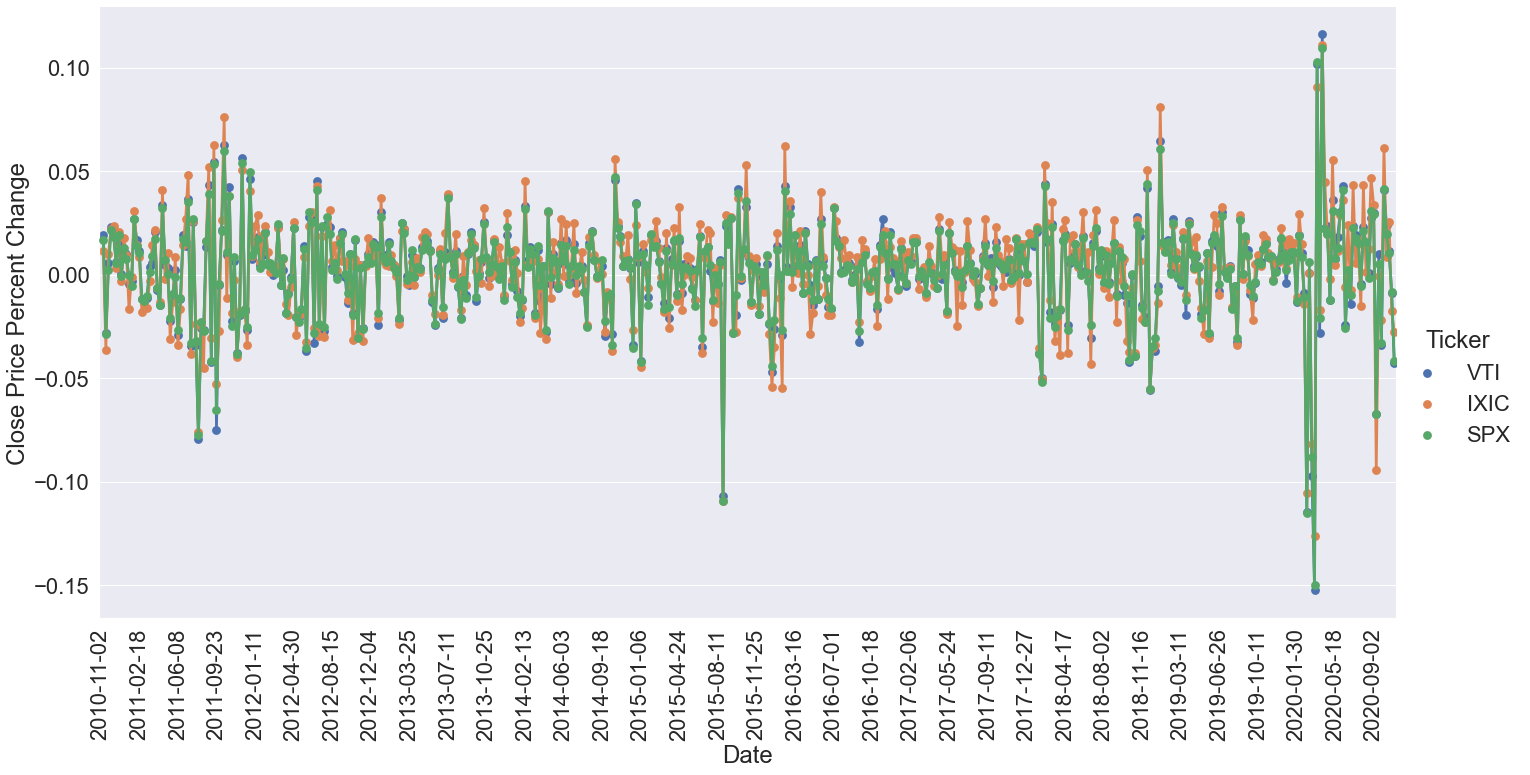

In [135]:
# seaborn line plot using allChangeDF data with date on x axis and close price percent change on y axis
percentChangePlot = sb.catplot(x="Date",y="Close Price Percent Change",hue="Ticker",data=allChangeDF,kind="point",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = percentChangePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)

In [136]:
# save the plot as PNG
percentChangePlot.savefig("PercentChangePlot.png")

In [137]:
# filter for dates after 2019-11-01
filteredAllChangeDF = allChangeDF[allChangeDF["Date"] > "2019-11-01"]
# filter for dates before 2020-11-01
filteredAllChangeDF = filteredAllChangeDF[filteredAllChangeDF["Date"] < "2020-11-01"]
filteredAllChangeDF

,Ticker,Date,Close Price,Close Price Percent Change
526,VTI,2019-11-08,157.160000,0.008535
521,VTI,2019-11-15,158.550000,0.008844
516,VTI,2019-11-22,158.140000,-0.002586
511,VTI,2019-12-02,158.570000,0.002719
506,VTI,2019-12-09,159.780000,0.007631
...,...,...,...,...
23298,SPX,2020-10-01,3380.800049,0.041339
23303,SPX,2020-10-08,3446.830078,0.019531
23308,SPX,2020-10-15,3483.340088,0.010592
23313,SPX,2020-10-22,3453.489990,-0.008569


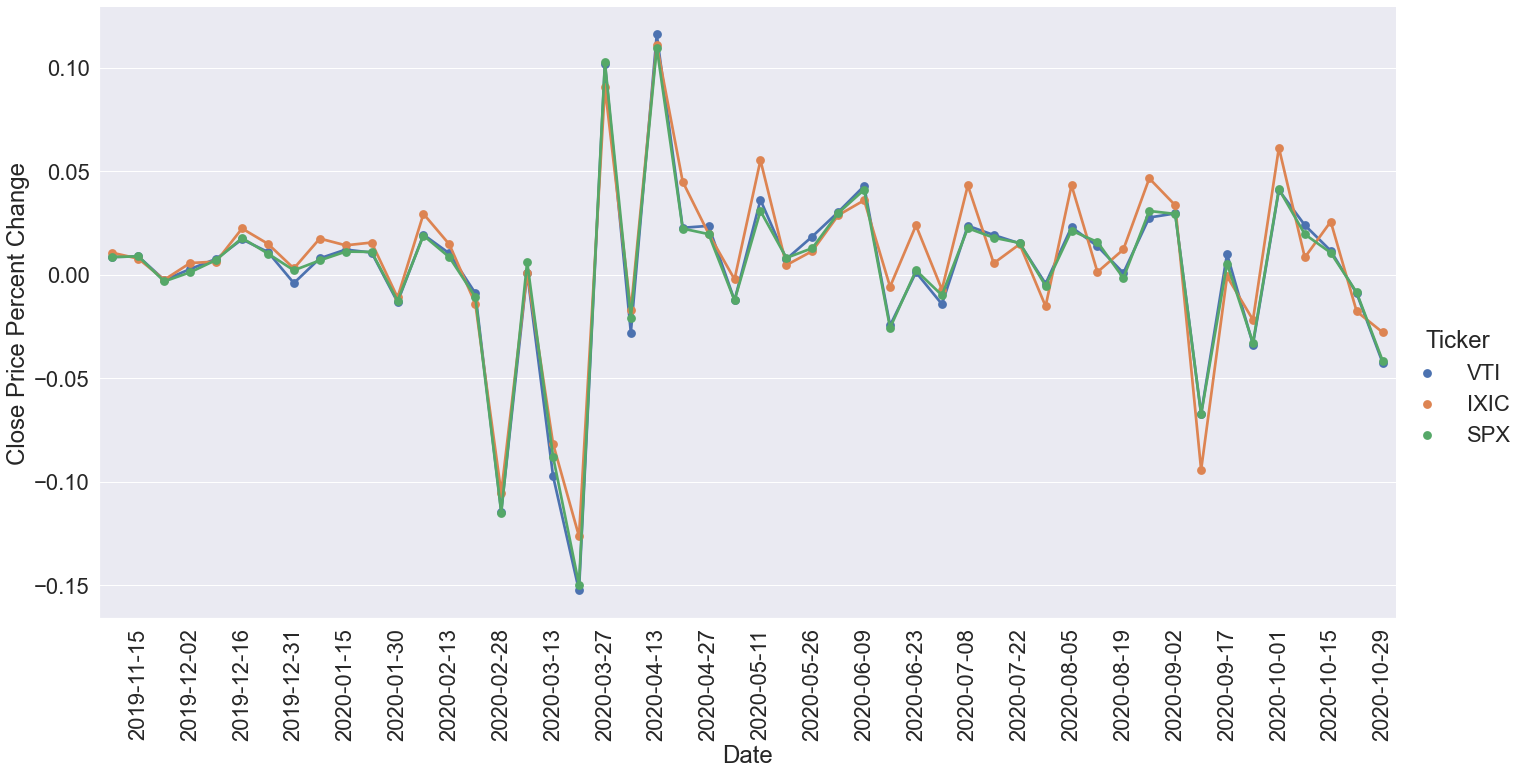

In [138]:
# seaborn line plot using filteredAllChangeDF data with date on x axis and close price percent change on y axis
percentChangePlotZoom = sb.catplot(x="Date",y="Close Price Percent Change",hue="Ticker",data=filteredAllChangeDF,kind="point",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = percentChangePlotZoom.ax.xaxis.get_ticklabels()
# iterate through every other x ticks
for label in p[::2]:
    # make the x labels not visible
    label.set_visible(False)

In [139]:
# save the plot as PNG
percentChangePlotZoom.savefig("percentChangePlotZoom.png")

In [140]:
# convert the values in the Volume column from scientific notation to integers using .astype('int64')
filteredIxicDF["Volume"] = filteredIxicDF["Volume"].astype('int64') 
filteredIxicDF

,Ticker,Date,Close Price,Raw Close,High,Low,Open,Volume
1994,IXIC,2010-11-02,2533.520020,2533.520020,2534.879883,2518.290039,2525.939941,1914980000
1999,IXIC,2010-11-09,2562.979980,2562.979980,2592.939941,2552.929932,2587.080078,2157370000
2004,IXIC,2010-11-16,2469.840088,2469.840088,2503.290039,2459.790039,2494.209961,2234090000
2009,IXIC,2010-11-23,2494.949951,2494.949951,2510.090088,2483.159912,2504.209961,1892260000
2014,IXIC,2010-12-01,2549.429932,2549.429932,2558.290039,2535.189941,2535.189941,2109940000
...,...,...,...,...,...,...,...,...
4489,IXIC,2020-10-01,11326.509766,11326.509766,11344.129883,11240.530273,11291.990234,3978100000
4494,IXIC,2020-10-08,11420.980469,11420.980469,11448.230469,11384.330078,11443.349609,3486530000
4499,IXIC,2020-10-15,11713.870117,11713.870117,11740.679688,11559.099609,11559.879883,3304490000
4504,IXIC,2020-10-22,11506.009766,11506.009766,11548.769531,11369.290039,11526.969727,3414590000


In [141]:
# assign new dataframe by getting the ticker, date, and volume columns
vtiVolumeDF = filteredVtiDF[["Ticker","Date","Volume"]]
vtiVolumeDF

,Ticker,Date,Volume
2796,VTI,2010-11-02,1004000
2791,VTI,2010-11-09,1001800
2786,VTI,2010-11-16,2115400
2781,VTI,2010-11-23,1481100
2776,VTI,2010-12-01,1611600
...,...,...,...
301,VTI,2020-10-01,3234067
296,VTI,2020-10-08,2335209
291,VTI,2020-10-15,2865532
286,VTI,2020-10-22,3763545


In [142]:
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Volume column
vtiVolumeDF["Volume Percent Change"] = vtiVolumeDF["Volume"].pct_change()
vtiVolumeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/2775232316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vtiVolumeDF["Volume Percent Change"] = vtiVolumeDF["Volume"].pct_change()


,Ticker,Date,Volume,Volume Percent Change
2796,VTI,2010-11-02,1004000,NaN
2791,VTI,2010-11-09,1001800,-0.002191
2786,VTI,2010-11-16,2115400,1.111599
2781,VTI,2010-11-23,1481100,-0.299849
2776,VTI,2010-12-01,1611600,0.088110
...,...,...,...,...
301,VTI,2020-10-01,3234067,-0.147177
296,VTI,2020-10-08,2335209,-0.277934
291,VTI,2020-10-15,2865532,0.227099
286,VTI,2020-10-22,3763545,0.313384


In [143]:
# assign new dataframe by getting the ticker, date, and volume columns
ixicVolumeDF = filteredIxicDF[["Ticker","Date","Volume"]]
ixicVolumeDF

,Ticker,Date,Volume
1994,IXIC,2010-11-02,1914980000
1999,IXIC,2010-11-09,2157370000
2004,IXIC,2010-11-16,2234090000
2009,IXIC,2010-11-23,1892260000
2014,IXIC,2010-12-01,2109940000
...,...,...,...
4489,IXIC,2020-10-01,3978100000
4494,IXIC,2020-10-08,3486530000
4499,IXIC,2020-10-15,3304490000
4504,IXIC,2020-10-22,3414590000


In [144]:
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Volume column
ixicVolumeDF["Volume Percent Change"] = ixicVolumeDF["Volume"].pct_change()
ixicVolumeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/541744260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ixicVolumeDF["Volume Percent Change"] = ixicVolumeDF["Volume"].pct_change()


,Ticker,Date,Volume,Volume Percent Change
1994,IXIC,2010-11-02,1914980000,NaN
1999,IXIC,2010-11-09,2157370000,0.126576
2004,IXIC,2010-11-16,2234090000,0.035562
2009,IXIC,2010-11-23,1892260000,-0.153006
2014,IXIC,2010-12-01,2109940000,0.115037
...,...,...,...,...
4489,IXIC,2020-10-01,3978100000,-0.025150
4494,IXIC,2020-10-08,3486530000,-0.123569
4499,IXIC,2020-10-15,3304490000,-0.052212
4504,IXIC,2020-10-22,3414590000,0.033318


In [145]:
# assign new dataframe by getting the ticker, date, and volume columns
spxVolumeDF = filteredSpxDF[["Ticker","Date","Volume"]]
spxVolumeDF

,Ticker,Date,Volume
20803,SPX,2010-11-02,3866200000
20808,SPX,2010-11-09,4848040000
20813,SPX,2010-11-16,5116380000
20818,SPX,2010-11-23,4133070000
20823,SPX,2010-12-01,4548110000
...,...,...,...
23298,SPX,2020-10-01,4070530000
23303,SPX,2020-10-08,3856190000
23308,SPX,2020-10-15,3717640000
23313,SPX,2020-10-22,4163630000


In [146]:
# create a new column and use .pct_change() to calculate the percent change between the current and previous
# row in the Volume column
spxVolumeDF["Volume Percent Change"] = spxVolumeDF["Volume"].pct_change()
spxVolumeDF

C:\Users\POKEPO~1\AppData\Local\Temp/ipykernel_10752/3389663305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spxVolumeDF["Volume Percent Change"] = spxVolumeDF["Volume"].pct_change()


,Ticker,Date,Volume,Volume Percent Change
20803,SPX,2010-11-02,3866200000,NaN
20808,SPX,2010-11-09,4848040000,0.253955
20813,SPX,2010-11-16,5116380000,0.055350
20818,SPX,2010-11-23,4133070000,-0.192189
20823,SPX,2010-12-01,4548110000,0.100419
...,...,...,...,...
23298,SPX,2020-10-01,4070530000,-0.115000
23303,SPX,2020-10-08,3856190000,-0.052657
23308,SPX,2020-10-15,3717640000,-0.035929
23313,SPX,2020-10-22,4163630000,0.119966


In [147]:
# make list of the dataframes to combine
volumeDFs = [vtiVolumeDF, ixicVolumeDF, spxVolumeDF]
# use pd.concat() to combine the dataframes in volumeDFs into a single dataframe
allVolumeDF = pd.concat(volumeDFs)
allVolumeDF

,Ticker,Date,Volume,Volume Percent Change
2796,VTI,2010-11-02,1004000,NaN
2791,VTI,2010-11-09,1001800,-0.002191
2786,VTI,2010-11-16,2115400,1.111599
2781,VTI,2010-11-23,1481100,-0.299849
2776,VTI,2010-12-01,1611600,0.088110
...,...,...,...,...
23298,SPX,2020-10-01,4070530000,-0.115000
23303,SPX,2020-10-08,3856190000,-0.052657
23308,SPX,2020-10-15,3717640000,-0.035929
23313,SPX,2020-10-22,4163630000,0.119966


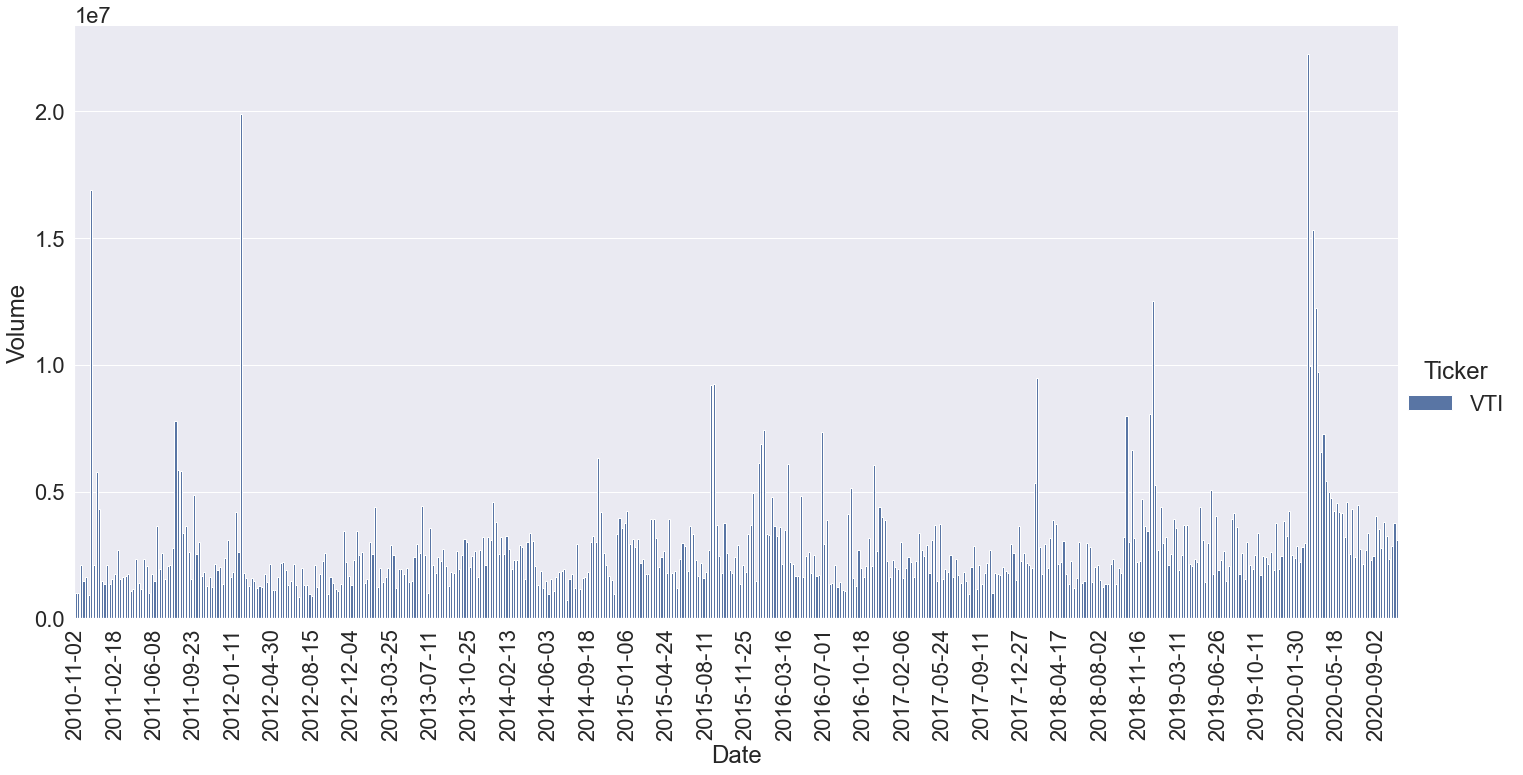

In [148]:
# seaborn bar plot using vtiVolumeDF data with date on x axis and volume on y axis
vtiVolumePlotZoom = sb.catplot(x="Date",y="Volume",hue="Ticker",data=vtiVolumeDF,kind="bar",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = vtiVolumePlotZoom.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)

In [149]:
# save the plot as PNG
vtiVolumePlotZoom.savefig("vtiVolumePlotZoom.png")

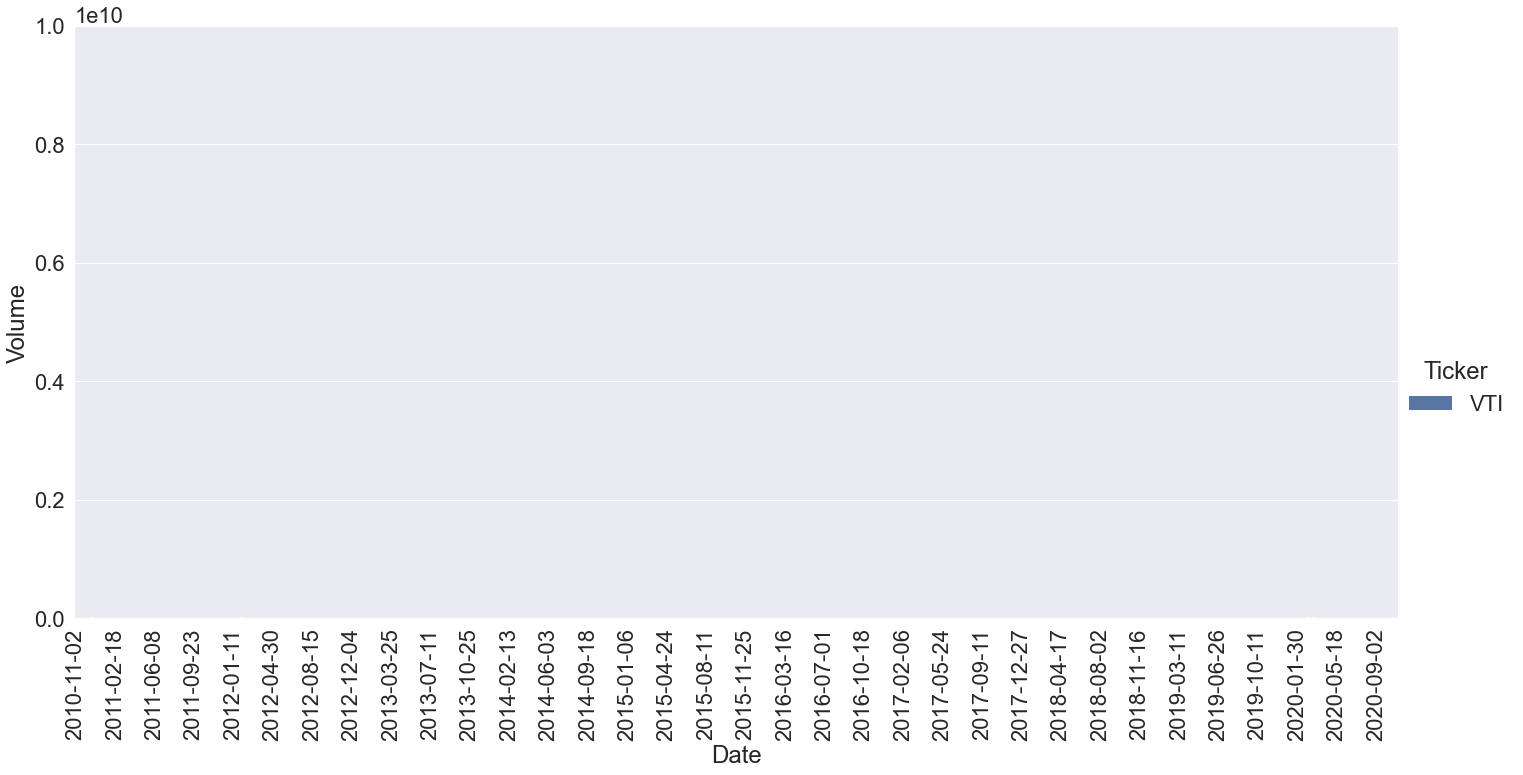

In [150]:
# seaborn bar plot using vtiVolumeDF data with date on x axis and volume on y axis
vtiVolumePlot = sb.catplot(x="Date",y="Volume",hue="Ticker",data=vtiVolumeDF,kind="bar",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = vtiVolumePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)
# set range of y axis from 0 to 10000000000
vtiVolumePlot.set(ylim=(0, 10000000000))

In [151]:
# save the plot as PNG
vtiVolumePlot.savefig("vtiVolumePlot.png")

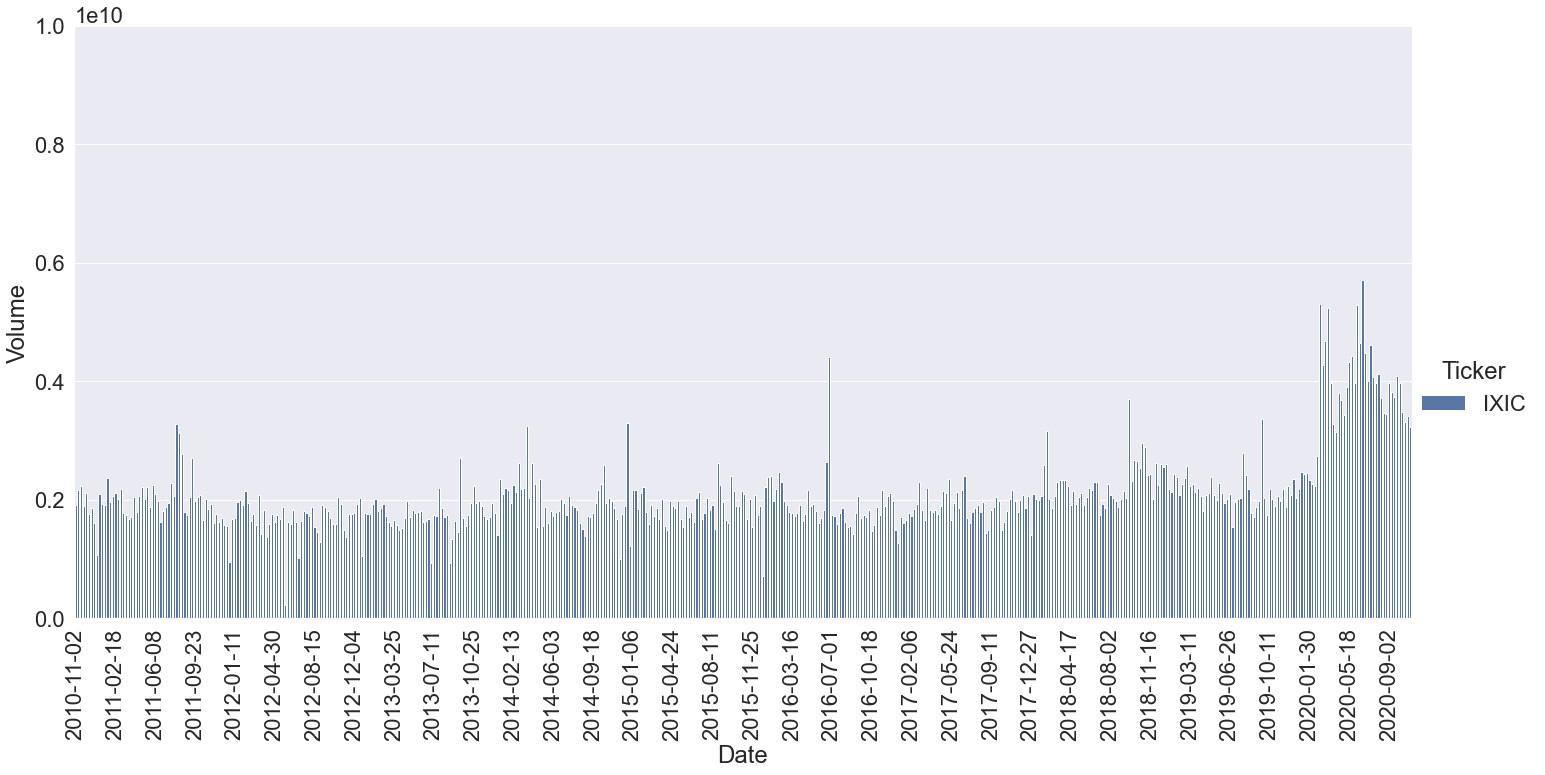

In [152]:
# seaborn bar plot using ixicVolumeDF data with date on x axis and volume on y axis
ixicVolumePlot = sb.catplot(x="Date",y="Volume",hue="Ticker",data=ixicVolumeDF,kind="bar",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = ixicVolumePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)
# set range of y axis from 0 to 10000000000
ixicVolumePlot.set(ylim=(0, 10000000000))

In [153]:
# save the plot as PNG
ixicVolumePlot.savefig("ixicVolumePlot.png")

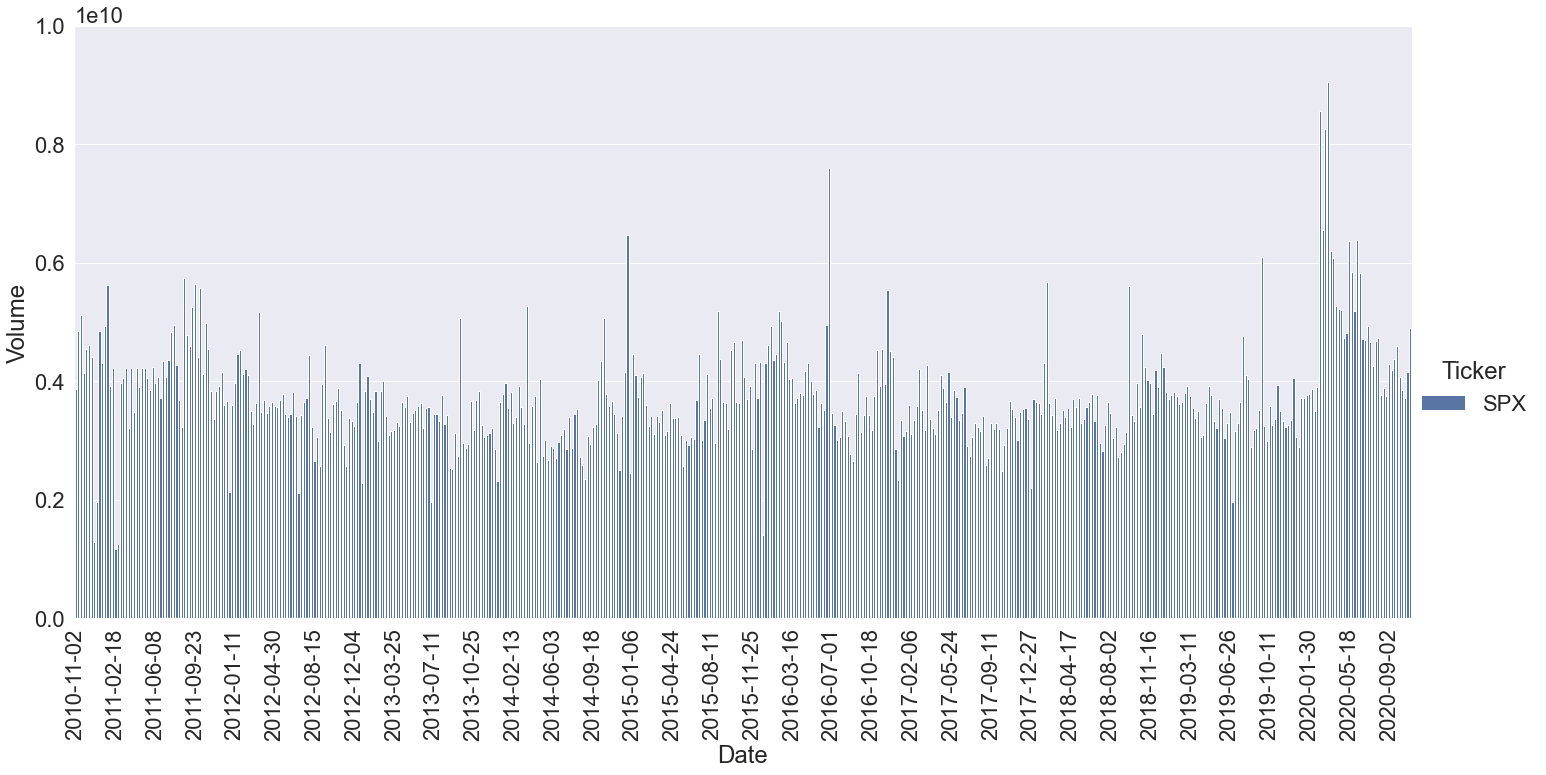

In [154]:
# seaborn bar plot using spxVolumeDF data with date on x axis and volume on y axis
spxVolumePlot = sb.catplot(x="Date",y="Volume",hue="Ticker",data=spxVolumeDF,kind="bar",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = spxVolumePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)
# set range of y axis from 0 to 10000000000
spxVolumePlot.set(ylim=(0, 10000000000))

In [155]:
# save the plot as PNG
spxVolumePlot.savefig("spxVolumePlot.png")

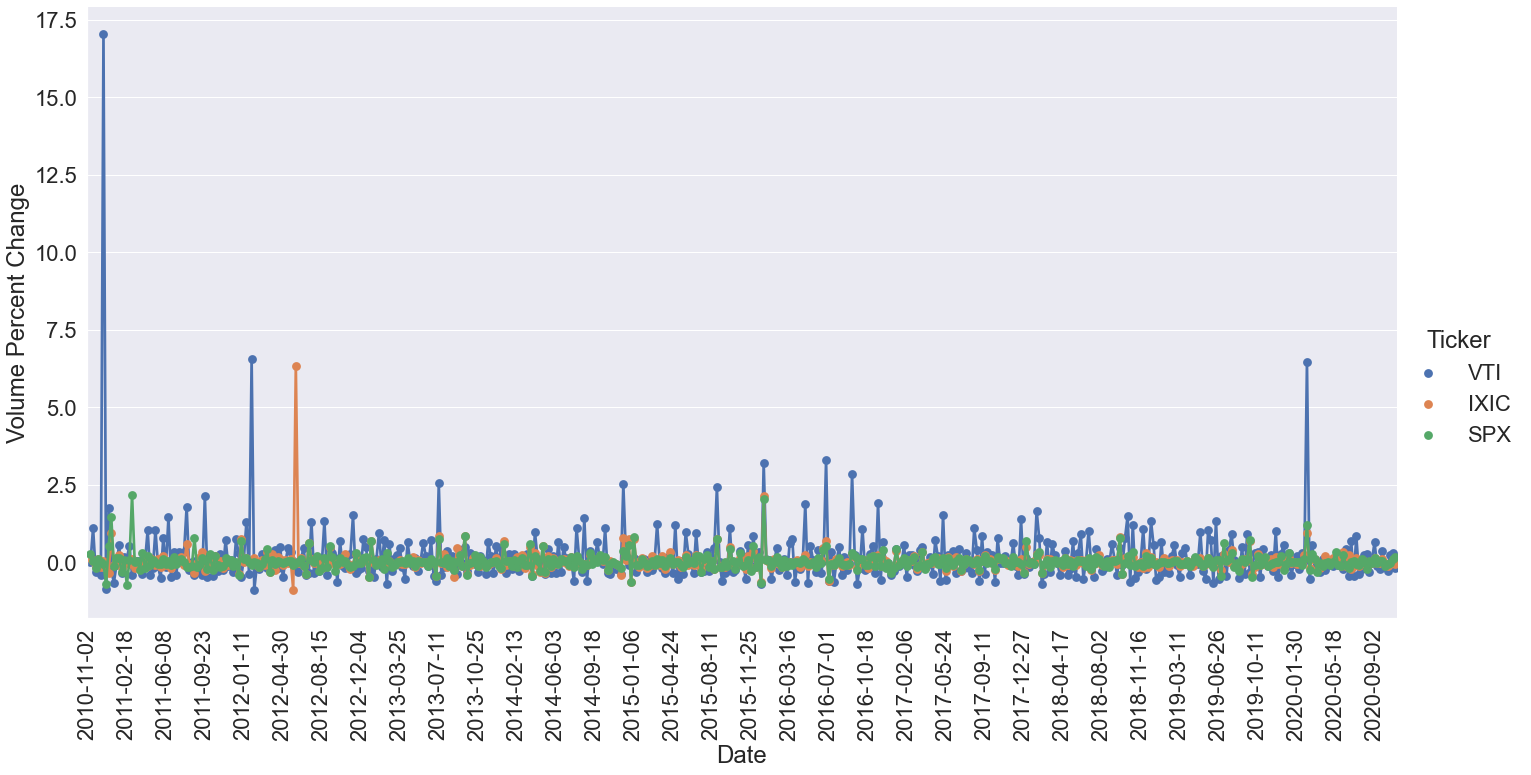

In [156]:
# seaborn line plot using allVolumeDF data with date on x axis and volume percent change on y axis
volumeChangePlot = sb.catplot(x="Date",y="Volume Percent Change",hue="Ticker",data=allVolumeDF,kind="point",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = volumeChangePlot.ax.xaxis.get_ticklabels()
# iterate through x ticks
for label in p:
    # make the x labels not visible
    label.set_visible(False)
# iterate through every 15th x tixk
for label in p[::15]:
    # make every 15th x label visible
    label.set_visible(True)

In [157]:
# save the plot as PNG
volumeChangePlot.savefig("volumeChangePlot.png")

In [158]:
# filter for dates after 2019-11-01
filteredAllVolumeDF = allVolumeDF[allVolumeDF["Date"] > "2019-11-01"]
# filter for dates before 2020-11-01
filteredAllVolumeDF = filteredAllVolumeDF[filteredAllVolumeDF["Date"] < "2020-11-01"]
filteredAllVolumeDF

,Ticker,Date,Volume,Volume Percent Change
526,VTI,2019-11-08,2132463,-0.114546
521,VTI,2019-11-15,2615406,0.226472
516,VTI,2019-11-22,1886328,-0.278763
511,VTI,2019-12-02,3767454,0.997242
506,VTI,2019-12-09,1934329,-0.486569
...,...,...,...,...
23298,SPX,2020-10-01,4070530000,-0.115000
23303,SPX,2020-10-08,3856190000,-0.052657
23308,SPX,2020-10-15,3717640000,-0.035929
23313,SPX,2020-10-22,4163630000,0.119966


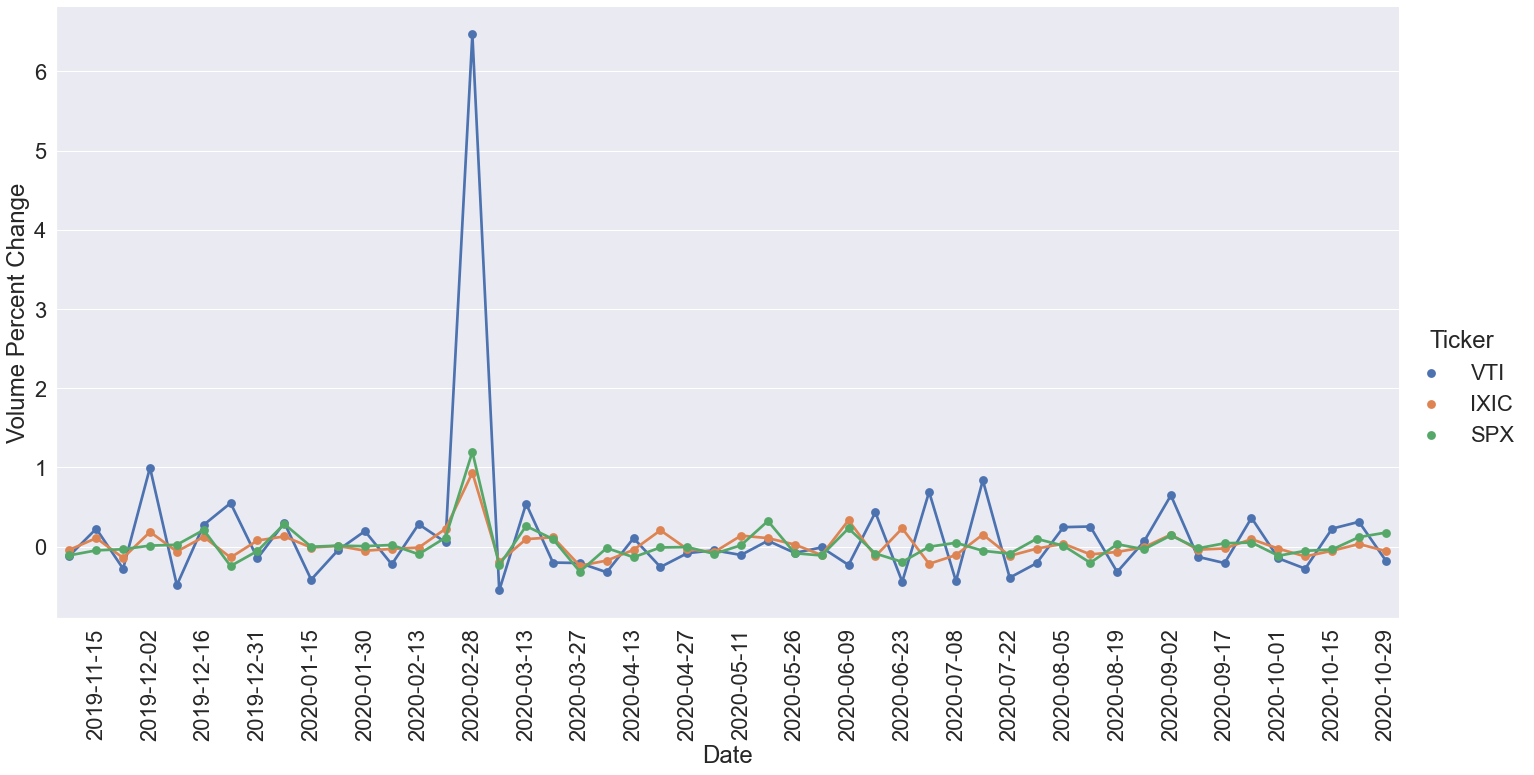

In [159]:
# seaborn line plot using filteredAllVolumeDF data with date on x axis and volume percent change on y axis
volumeChangePlotZoom = sb.catplot(x="Date",y="Volume Percent Change",hue="Ticker",data=filteredAllVolumeDF,kind="point",aspect=2,height=10).set_xticklabels(rotation=90)
# list of the x ticks to be used for iterating
p = volumeChangePlotZoom.ax.xaxis.get_ticklabels()
# iterate through every other x ticks
for label in p[::2]:
    # make the x labels not visible
    label.set_visible(False)

In [160]:
# save the plot as PNG
volumeChangePlotZoom.savefig("volumeChangePlotZoom.png")